In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
vgg = tf.keras.applications.VGG19(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)


In [5]:
def Visualize(op_layer, img , plot = False,no_of_plots=16):

    print('vgg19[',op_layer,'] layers visualization')

    model = keras.Model(vgg.input, vgg.get_layer(op_layer).output)
    img = tf.keras.applications.vgg19.preprocess_input(img).reshape(1,361,642,3)
    y = model.predict(img)

    d = sorted (np.random.choice(y.shape[-1],no_of_plots))
    print(y.shape)


    fig = plt.figure(figsize=(16,8))
    columns = 4
    rows = no_of_plots//4


    for i in range(no_of_plots):
        fig.add_subplot(rows, columns, i+1)
        plt.axis('off')
        plt.title('filter: ' + str(d[i]))
        plt.imshow(y[0, :, :, d[i]])
        
    plt.show()


In [6]:
l = ['block2_conv1','block4_conv1','block3_conv4']
im = cv.imread('1.jpeg')

vgg19[ block2_conv1 ] layers visualization
(1, 180, 321, 128)


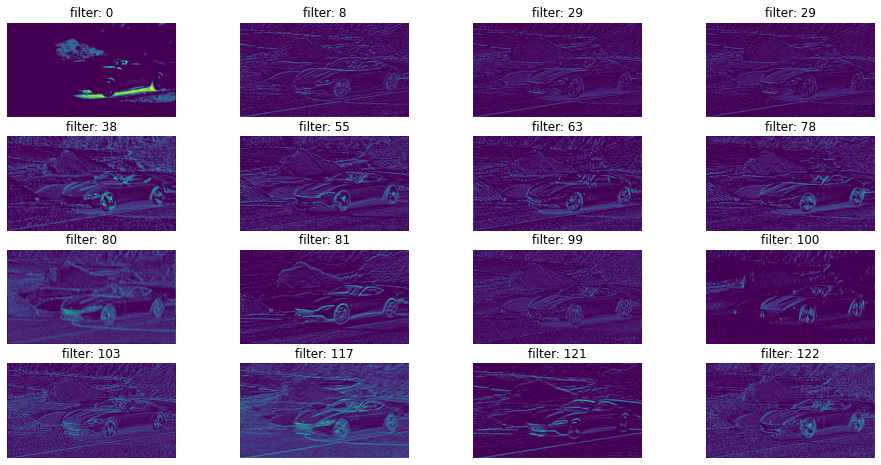

vgg19[ block4_conv1 ] layers visualization
(1, 45, 80, 512)


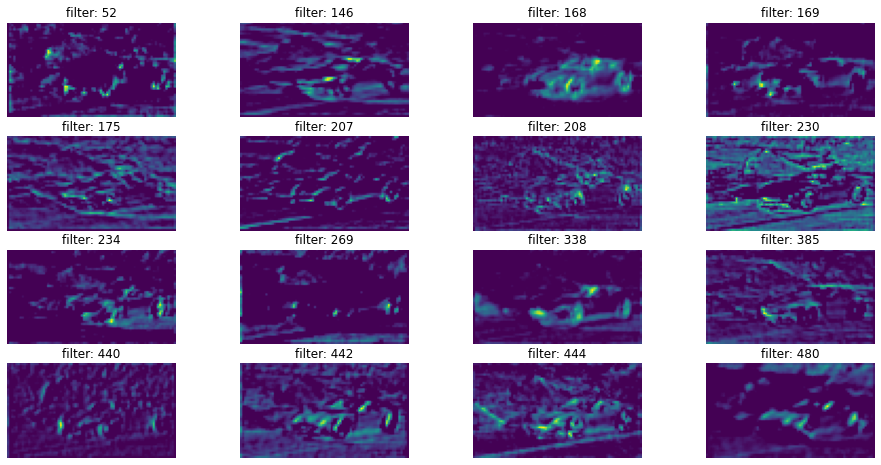

vgg19[ block3_conv4 ] layers visualization
(1, 90, 160, 256)


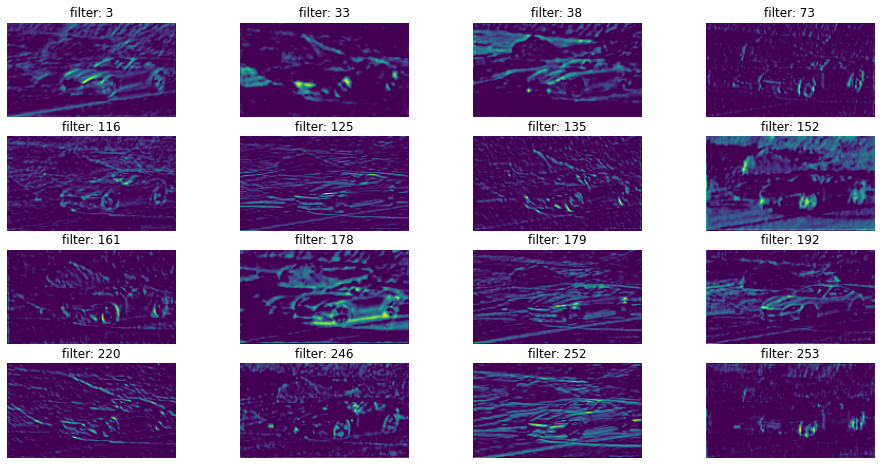

In [7]:
for i in l:
    Visualize(i,im)

In [ ]:
https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function

In [ ]:
[i.name for i in vgg.layers] # [3,6,11,16,21] ['block2_conv1','block2_conv2','block3_conv4']